### 1. Reading the CSV file into a pandas dataframe. 

In [1]:
import pandas as pd

data = pd.read_csv("../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv")

In [2]:
data.head() #to validate the data that has been read into the session.

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


###  2. Add columns to the dataframe containing: 
#### The total (East + West) bicycle count
#### The hour of the day
#### The year

In [3]:
data['Total (East + West) bicycle count'] = data['Fremont Bridge East Sidewalk'] + data['Fremont Bridge West Sidewalk']

In [4]:
data['Hour of the day'] = pd.to_datetime(data['Date']).dt.hour

In [5]:
data['year'] = pd.to_datetime(data['Date']).dt.year

In [6]:
data.head() # to validate the new columns that have been added

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total (East + West) bicycle count,Hour of the day,year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


### 3. Create a dataframe with the subset of data from the year 2016

In [7]:
# Create a new dataframe with just the data from 2016
data_2016 = data[data['year'] == 2016]

In [8]:
# Print the first few rows to quickly validate the result
data_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total (East + West) bicycle count,Hour of the day,year
19680,12/31/2016 11:00:00 PM,4.0,4.0,8.0,23,2016
19681,12/31/2016 10:00:00 PM,7.0,8.0,15.0,22,2016
19682,12/31/2016 09:00:00 PM,4.0,6.0,10.0,21,2016
19683,12/31/2016 08:00:00 PM,3.0,6.0,9.0,20,2016
19684,12/31/2016 07:00:00 PM,6.0,4.0,10.0,19,2016


### 4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) 

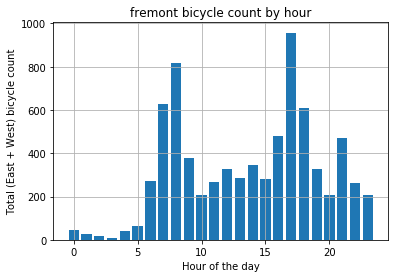

In [9]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.bar('Hour of the day', 'Total (East + West) bicycle count', data = data_2016)

plt.xlabel('Hour of the day')
plt.ylabel('Total (East + West) bicycle count')
plt.title('fremont bicycle count by hour')
plt.grid(True)
plt.show()

### 5. Use pandas to determine what is (on average) the busiest hour of the day

In [10]:
# First get the mean for each hour as a series
data_2016_hourly_mean_series = data_2016.groupby(['Hour of the day'])['Total (East + West) bicycle count'].mean() 

In [11]:
# Convert the result to a dataframe
data_2016_hourly_mean = pd.DataFrame({'Hour': data_2016_hourly_mean_series.index, 'mean_bicycle_count': data_2016_hourly_mean_series.values})

In [12]:
# Get the busiest hour
data_2016_hourly_mean_busiest_hour = data_2016_hourly_mean[data_2016_hourly_mean['mean_bicycle_count'] == data_2016_hourly_mean['mean_bicycle_count'].max()]

In [13]:
# Print the result
print('The busiest hour of a day is: ' + data_2016_hourly_mean_busiest_hour['Hour'].to_string(index = False) + ':00')

The busiest hour of a day is: 17:00
